In [2]:
import json
import random
import pandas as pd

### output: csv file

In [127]:
with open(".\\ben_features_new.json", 'r') as f:
    data = json.loads(f.read())

with open(".\\mal_features_new.json", 'r') as f:
    data.update(json.loads(f.read()))

In [130]:
type_list = ['OneLiner', 'VariableExtension', 'AbnormalSize', 'Obfuscation', 'Entropy',
             'PositiveContext', 'ScriptLogging', 'FunctionBody', 'License',
             'Downloader', 'StartsProcess', 'ScriptExecution', 'Crypto', 'Enumeration', 
             'HiddenWindow', 'CustomWebFields', 'Persistence', 'Registry', 'Sleeps',
             'SysInternals', 'Compression', 'UninstallsApps', 'ByteUsage', 
             'NegativeContext', 'KnownMalware', 'CodeInjection', 'DNSC2', 'AppLockerBypass',
             'AMSIBypass', 'EmbeddedFile', 'ClearLogs', 'DisabledProtections', 'ScreenScraping'
            ]
# type_list = ['OneLiner', 'VariableExtension', 'AbnormalSize', 'Obfuscation',
#              'PositiveContext', 'ScriptLogging', 'FunctionBody', 'License',
#              'Downloader', 'StartsProcess', 'ScriptExecution', 'Crypto', 'Enumeration', 
#              'HiddenWindow', 'CustomWebFields', 'Persistence', 'Registry', 'Sleeps',
#              'SysInternals', 'Compression', 'UninstallsApps', 'ByteUsage', 
#              'NegativeContext', 'KnownMalware', 'CodeInjection', 'DNSC2', 'AppLockerBypass',
#              'AMSIBypass', 'EmbeddedFile', 'ClearLogs', 'DisabledProtections', 'ScreenScraping'
#             ]

# type_list = ['OneLiner', 'VariableExtension', 'AbnormalSize', 'Obfuscation', 'Entropy']
# type_list = ['OneLiner', 'VariableExtension', 'AbnormalSize', 'Obfuscation']

# type_list = ['PositiveContext', 'ScriptLogging', 'FunctionBody', 'License']

# type_list = ['Downloader', 'StartsProcess', 'ScriptExecution', 'Crypto', 'Enumeration', 
#              'HiddenWindow', 'CustomWebFields', 'Persistence', 'Registry', 'Sleeps',
#              'SysInternals', 'Compression', 'UninstallsApps', 'ByteUsage']

# type_list = ['NegativeContext', 'KnownMalware', 'CodeInjection', 'DNSC2', 'AppLockerBypass',
#              'AMSIBypass', 'EmbeddedFile', 'ClearLogs', 'DisabledProtections', 'ScreenScraping']


new_data={}
for n in data:
    new_data[n] = []
    for type in type_list:
        if type in data[n]:
            new_data[n].append(int(1))
        else:
            new_data[n].append(int(0))
    
    new_data[n][4] = str(data[n][-1]) ##

    for type in data[n][:-1]: ##

        if type.find("KnownMalware") != -1:
            new_data[n][24] = type[13:] ##
            # new_data[n][23] = type[13:] ##
        
        if type.find("Obfuscation") != -1:
            if type.find("Obfuscation:") != -1:
                new_data[n][3] = type[12:]
            else:
                new_data[n][3] = "dominant"


    if n.find("ben") != -1:
        new_data[n].append(int(0))
    else:
        new_data[n].append(int(1))


In [131]:
df = pd.DataFrame(new_data).T
df.columns=[ 'OneLiner', 'VariableExtension', 'AbnormalSize', 'Obfuscation', 'Entropy',
             'PositiveContext', 'ScriptLogging', 'FunctionBody', 'License',
             'Downloader', 'StartsProcess', 'ScriptExecution', 'Crypto', 'Enumeration', 
             'HiddenWindow', 'CustomWebFields', 'Persistence', 'Registry', 'Sleeps',
             'SysInternals', 'Compression', 'UninstallsApps', 'ByteUsage', 
             'NegativeContext', 'KnownMalware', 'CodeInjection', 'DNSC2', 'AppLockerBypass',
             'AMSIBypass', 'EmbeddedFile', 'ClearLogs', 'DisabledProtections', 'ScreenScraping',
             'Result']

# df.columns=[ 'OneLiner', 'VariableExtension', 'AbnormalSize', 'Obfuscation',
#              'PositiveContext', 'ScriptLogging', 'FunctionBody', 'License',
#              'Downloader', 'StartsProcess', 'ScriptExecution', 'Crypto', 'Enumeration', 
#              'HiddenWindow', 'CustomWebFields', 'Persistence', 'Registry', 'Sleeps',
#              'SysInternals', 'Compression', 'UninstallsApps', 'ByteUsage', 
#              'NegativeContext', 'KnownMalware', 'CodeInjection', 'DNSC2', 'AppLockerBypass',
#              'AMSIBypass', 'EmbeddedFile', 'ClearLogs', 'DisabledProtections', 'ScreenScraping',
#              'Result']


# df.columns = ['OneLiner', 'VariableExtension', 'AbnormalSize', 'Obfuscation', 'Entropy', 'Result']
# df.columns = ['OneLiner', 'VariableExtension', 'AbnormalSize', 'Obfuscation', 'Result']

# df.columns = ['PositiveContext', 'ScriptLogging', 'FunctionBody', 'License', 'Result']

# df.columns = ['Downloader', 'StartsProcess', 'ScriptExecution', 'Crypto', 'Enumeration', 
#              'HiddenWindow', 'CustomWebFields', 'Persistence', 'Registry', 'Sleeps',
#              'SysInternals', 'Compression', 'UninstallsApps', 'ByteUsage', 'Result']

# df.columns = ['NegativeContext', 'KnownMalware', 'CodeInjection', 'DNSC2', 'AppLockerBypass',
#              'AMSIBypass', 'EmbeddedFile', 'ClearLogs', 'DisabledProtections', 'ScreenScraping', 'Result']



df.to_csv("scripts.csv")

---

In [1]:
import math
import pickle
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, log_loss, roc_auc_score, plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

C:\Users\alice\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [50]:
dataset = pd.read_csv("for_unseen.csv")
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

# df_24 = pd.DataFrame(X[:, 24])
# print(df_24.value_counts())

le = LabelEncoder()
X[:, 3] = le.fit_transform(X[:, 3])
X[:, 24] = le.fit_transform(X[:, 24])
y = le.fit_transform(y)

# df_24 = pd.DataFrame(X[:, 24]).value_counts()
# df_24.to_csv("df_24.csv")

# sc = StandardScaler()
# X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 88) # 88 89

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
pickle.dump(sc, open('unseen_scaler.pkl','wb'))

feature_name = []
count = 1
for n in dataset.columns[1:-1]:
    fea = "F"+ str(count) +" : " + n
    feature_name.append(fea)
    count += 1

print(feature_name)

['F1 : OneLiner', 'F2 : VariableExtension', 'F3 : AbnormalSize', 'F4 : Obfuscation', 'F5 : Entropy', 'F6 : PositiveContext', 'F7 : ScriptLogging', 'F8 : FunctionBody', 'F9 : License', 'F10 : Downloader', 'F11 : StartsProcess', 'F12 : ScriptExecution', 'F13 : Crypto', 'F14 : Enumeration', 'F15 : HiddenWindow', 'F16 : CustomWebFields', 'F17 : Persistence', 'F18 : Registry', 'F19 : Sleeps', 'F20 : SysInternals', 'F21 : Compression', 'F22 : UninstallsApps', 'F23 : ByteUsage', 'F24 : NegativeContext', 'F25 : KnownMalware', 'F26 : CodeInjection', 'F27 : DNSC2', 'F28 : AppLockerBypass', 'F29 : AMSIBypass', 'F30 : EmbeddedFile', 'F31 : ClearLogs', 'F32 : DisabledProtections', 'F33 : ScreenScraping']


### Model - xgboost

In [51]:
# X_test = dataset.iloc[:, 1:-1].values
# y_test = dataset.iloc[:, -1].values

# le = LabelEncoder()
# X_test[:, 3] = le.fit_transform(X_test[:, 3])
# X_test[:, 24] = le.fit_transform(X_test[:, 24])
# y_test = le.fit_transform(y_test)

In [52]:
xgboostModel = XGBClassifier(n_estimators=100, learning_rate= 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
xgboostModel.fit(X_train, y_train, eval_metric=["logloss", "auc"], eval_set=eval_set, verbose=False) 
y_pred = xgboostModel.predict(X_test)
predictions = [round(value) for value in y_pred]

C:\Users\alice\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [53]:
file_name = "unseen_xgb_reg.pkl"

# save
pickle.dump(xgboostModel, open(file_name, "wb"))

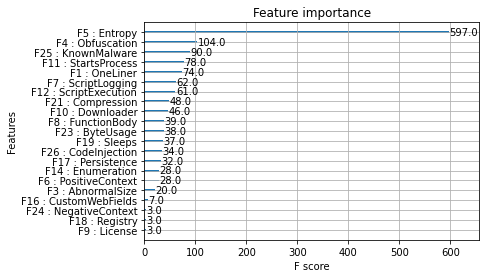

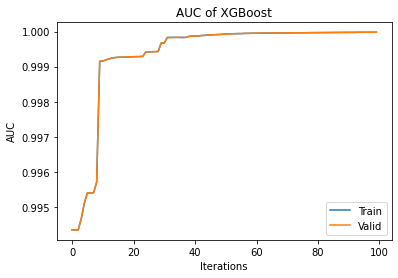

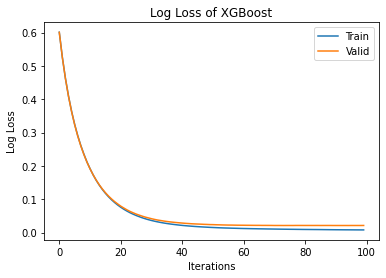

In [54]:
# feature importance
xgboostModel.get_booster().feature_names = feature_name
plot_importance(xgboostModel.get_booster())
pyplot.show()

# retrieve performance metrics
results = xgboostModel.evals_result()
epochs = len(results['validation_0']["logloss"])
x_axis = range(0, epochs)

acc_0_list =[]
acc_1_list =[]
for x in results['validation_0']['logloss']:
    acc_0_list.append(1-x)
for x in results['validation_1']['auc']:
    acc_1_list.append(1-x) 

# plot AUC
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['auc'], label='Train')
ax.plot(x_axis, results['validation_0']['auc'], label='Valid')
ax.legend()
plt.ylim()
pyplot.ylabel('AUC')
pyplot.xlabel('Iterations')
pyplot.title('AUC of XGBoost')
pyplot.show()

# plot error
# fig, ax = pyplot.subplots()
# ax.plot(x_axis, results['validation_0']['error'], label='Train')
# ax.plot(x_axis, results['validation_0']['error'], label='Valid')
# ax.legend()
# plt.ylim()
# pyplot.ylabel('Error')
# pyplot.xlabel('Iterations')
# pyplot.title('Error of XGBoost')
# pyplot.show()

# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Valid')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.xlabel('Iterations')
pyplot.title('Log Loss of XGBoost')
pyplot.show()

Accuracy: 99.43%
Precision: 99.65%
Recall: 99.30%
F1_Score: 99.47%
Log loss: 0.197995
AUC: 99.44%
[[715   3]
 [  6 846]]


C:\Users\alice\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


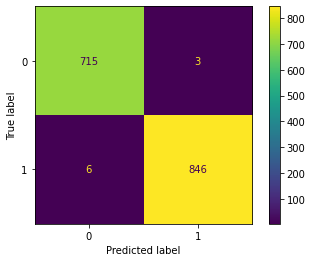

In [55]:
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

precision = precision_score(y_test, y_pred)
print("Precision: %.2f%%" % (precision * 100.0))

recall = recall_score(y_test, y_pred)
print("Recall: %.2f%%" % (recall * 100.0))

f1 = f1_score(y_test, y_pred)
print("F1_Score: %.2f%%" % (f1 * 100.0))

logloss = log_loss(y_test, y_pred)
print("Log loss: %f" % logloss)

AUC = roc_auc_score(y_test, y_pred)
print("AUC: %.2f%%" % (AUC * 100.0))

print(confusion_matrix(y_test, y_pred))

plot_confusion_matrix(xgboostModel, X_test, y_test)
